In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import griddata
from matplotlib.gridspec import GridSpec
import struct

MeshesVertices = dict()
MeshesEdges = dict()
MeshesFaces = dict()
Solution = dict()
MinMax = []

for n in range(1,5):
    Vadress = "Meshdata/VerticesRing" + str(n) +".txt"
    MeshesVertices['V'+str(n)] = np.genfromtxt( Vadress )
    Eadress = "Meshdata/EdgesRing" + str(n) +".txt"
    MeshesEdges['E'+str(n)] = np.genfromtxt( Eadress )
    Fadress = "Meshdata/FacesRing" + str(n) +".txt"
    MeshesFaces['F'+str(n)] = np.genfromtxt( Fadress )
    
    
    Soladress = "Solutions/PoissonSolutionRing" + str(n) + ".txt"
    Solution['Sol'+str(n)] = np.genfromtxt( Soladress )

    #Find Scale for colorbar
    MinMax.append(np.min(Solution['Sol'+str(n)]))
    MinMax.append(np.max(Solution['Sol'+str(n)]))

GlobalMinMax = np.min(MinMax),np.max(MinMax)

In [17]:
def InterpolationPlot( Vertices , Values, Title, Triangulation ):
    #define grid
    xi = np.linspace(0.,1.,1001)
    yi = np.linspace(0.,1.,1001)
    # grid the data
    zi = griddata( Vertices , Values, (xi[None,:], yi[:,None]), method='cubic')
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS1 = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k',vmin=GlobalMinMax[0],vmax=GlobalMinMax[1])
    CS2 = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet,alpha=0.5,vmin=GlobalMinMax[0],vmax=GlobalMinMax[1])
    plt.clabel(CS1,inline=True,fontsize=10)
    plt.colorbar() # draw colorbar
    # plot data points.
    plt.scatter(Vertices[::,:1:],Vertices[::,1::],marker='o',c='b',s=10)
    for i in range(0, len(Triangulation) , 1):
        for j in range( 0, 3 , 1):
                k = int(Triangulation[i][j])
                l = int(Triangulation[i][(j+1)%3])
                plt.plot( [Vertices[k][0],Vertices[l][0]], [Vertices[k][1],Vertices[l][1]] , c='grey',alpha=0.5)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title(Title)

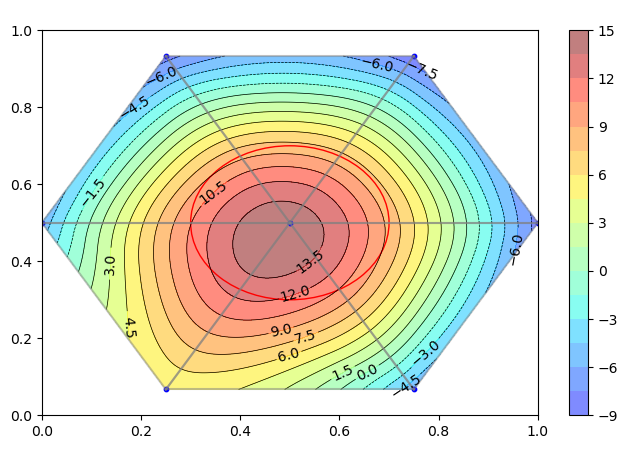

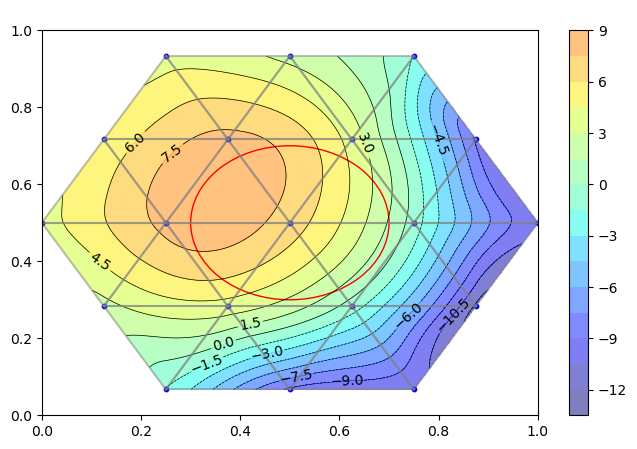

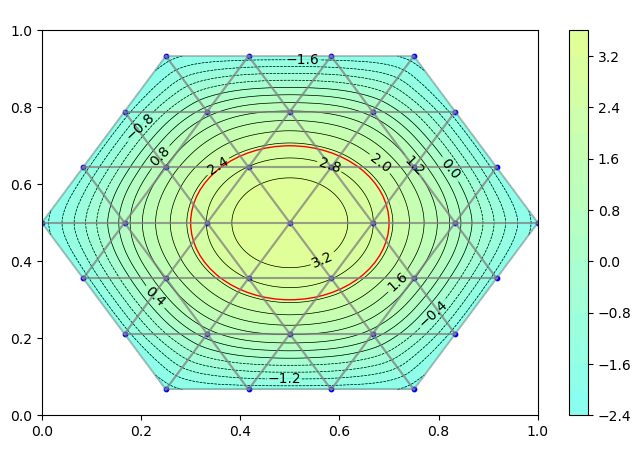

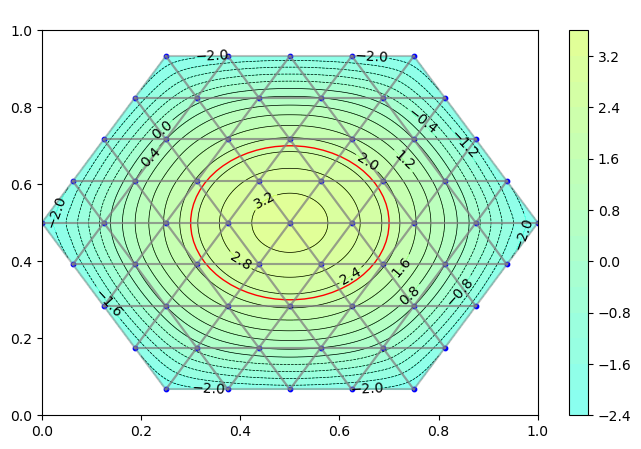

In [18]:
#plt.figure(figsize=(16,8))
for n in range(1,5):
    fig, ax = plt.subplots(figsize=(8, 5))
    InterpolationPlot( MeshesVertices['V'+str(n)] , Solution['Sol'+str(n)] , ' ' , MeshesFaces['F'+str(n)] )
    circ = plt.Circle( (0.5,0.5), 0.2, fill=False, color='red')
    ax.add_patch(circ)
    plt.show()